<a href="https://colab.research.google.com/github/jacqlin13/Ckd_trends/blob/main/CKD_TRENDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈CHRONIC KIDNEY DISEASE TRENDS
#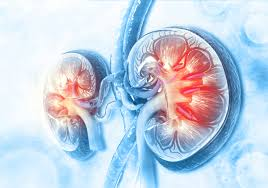
Project type: Medical Research

Project done by: SHARON JACQUILINE S

Dated on: 31-08-2025

GitHub link:https://github.com/jacqlin13/Ckd_trends#ckd_trends




# ✈ Quick Summary :
✅ This dataset allows us to analyze **biomarker importance, comorbidity effects, stage-wise progression, and demographic trends** in CKD.
### Dataset Overview
- **Records:** 202 patients
- **Features:** 29 clinical and demographic attributes
- **Target Variable:** `class` (CKD / Not-CKD)
- **Data Types:** Mix of categorical (ranges, discrete values) and numerical values
- **Missing Values:** Present in most attributes except `age` and `affected`

### Key Feature Groups
- **Renal Function Indicators:** Serum creatinine (sc), blood urea (bu), GFR (grf), CKD stage (stage)
- **Urine Markers:** Specific gravity (sg), albumin (al), sugar (su), red blood cells (rbc), pus cells (pc), bacteria (ba)
- **Blood Composition:** Hemoglobin (hemo), packed cell volume (pcv), RBC count (rbcc), WBC count (wbcc), sodium (sod), potassium (pot)
- **Comorbidities / Clinical Conditions:** Hypertension (htn), diabetes (dm), coronary artery disease (cad), anemia (ane), pedal edema (pe)
- **Demographics:** Age, affected (disease status), appetite (appet)

### Focus Areas for EDA
1. **Feature Impact on CKD Progression**
   - Assess how renal markers (sc, bu, grf) and blood/urine indicators change with CKD presence.
   - Identify early-warning biomarkers that strongly separate CKD vs non-CKD.

2. **Comorbidity Relationships**
   - Study co-occurrence of hypertension, diabetes, and CAD with CKD.
   - Analyze secondary effects like anemia and edema as signs of progression.

3. **Stage-wise Trends**
   - Compare lab test distributions across CKD stages (s1 to s5).
   - Track how renal dysfunction worsens with stage advancement.

4. **Demographic Patterns**
   - Age distribution of affected vs unaffected groups.
   - Explore whether younger vs older groups show different CKD patterns.






# 🩺 Problem Statement
Chronic Kidney Disease (CKD) is a progressive condition often linked with
hypertension, diabetes, and cardiovascular complications. This project
analyzes patient data to uncover key biomarkers, comorbidity patterns,
and stage-wise progression trends, aiming to support early detection
and better management of CKD risks.


# Coding part ⏭

In [ ]:
# @title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title Dataset
import pandas as pd

df = pd.read_csv("/content/ckd-dataset-v2.csv")
display(df.head())

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,Jan-01,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,â‰¥ 227.944,s1,1,< 12
3,0,0,1.019 - 1.022,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,â‰¥ 227.944,s1,1,< 12
4,0,0,1.019 - 1.023,â‰¥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [ ]:
# @title Rows & Columns count
# Get the number of rows and columns
num_rows, num_cols = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 202
Number of columns: 29


In [ ]:
# @title Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc      

In [ ]:
# @title Duplicate values
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
# @title Missing/Null values
# Check for missing values and sum them up per column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64



# 1.🔎 Insights about the Dataset
  
✅ *This dataset is well-suited for exploring how clinical features and comorbidities contribute to CKD onset, progression, and risk patterns.*
1. **Dataset Composition**  
   - Contains **202 patient records** with **29 attributes** (clinical, lab, and demographic data).  
   - The target variable is **`class`** (CKD / Not-CKD).  

2. **Clinical Features**  
   - **Renal function indicators:** serum creatinine (sc), blood urea (bu), glomerular filtration rate (grf).  
   - **Urine markers:** specific gravity (sg), albumin (al), sugar (su), pus cells (pc), red blood cells (rbc).  
   - **Blood composition:** hemoglobin (hemo), packed cell volume (pcv), rbcc, wbcc, sodium (sod), potassium (pot).  

3. **Comorbidities Captured**  
   - Major risk factors: **hypertension (htn)**, **diabetes (dm)**, **coronary artery disease (cad)**.  
   - Secondary complications: **anemia (ane)**, **edema (pe)** → useful for studying disease progression.  

4. **Stage-wise Tracking**  
   - Feature **`stage`** categorizes patients (s1–s5) → helps analyze CKD progression.  
   - Trend example: higher serum creatinine + lower hemoglobin at advanced stages.  

5. **Data Quality & Structure**  
   - Many attributes stored as **ranges/thresholds** (e.g., "112 - 154", "< 48.1").  
   - Missing values exist across several features → requires preprocessing.  
   - Most features are `"object"` type due to categorical/range encoding → must be converted to numeric for analysis.  

6. **Potential for Insights**  
   - Identify **key biomarkers** predictive of CKD.  
   - Study **interactions between comorbidities** and disease risk.  
   - Track **stage-wise deterioration** to highlight clinical thresholds.  
   - Explore **age-based and demographic patterns** in CKD prevalence.  


# 2.variable description

In [ ]:
# @title Understanding the variables
# Display unique values and their counts for a few representative columns
print("Unique values and counts for 'class':")
display(df['class'].value_counts())

print("\nUnique values and counts for 'stage':")
display(df['stage'].value_counts())

print("\nUnique values and counts for 'sg':")
display(df['sg'].value_counts())

# Display descriptive statistics (might not be very informative for object type columns)
print("\nDescriptive statistics for the dataset:")


Unique values and counts for 'class':


,count
class,
ckd,128
notckd,72
discrete,1



Unique values and counts for 'stage':


,count
stage,
s1,54
s4,45
s5,35
s2,35
s3,31
discrete,1



Unique values and counts for 'sg':


,count
sg,
discrete,1
1.019 - 1.021,1
1.019 - 1.022,1
1.019 - 1.023,1
1.019 - 1.024,1
...,...
1.019 - 1.216,1
1.019 - 1.217,1
1.019 - 1.218,1



Descriptive statistics for the dataset:


In [ ]:
# @title Dataset describe
display(df.describe())

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,202,202
unique,3,4,201,6,3,3,7,3,3,3,...,3,3,3,3,3,3,12,6,4,12
top,1,0,discrete,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,1,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [ ]:
# @title Check unique values for each column
# Check unique values for each column
for col in df.columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30) # Separator for readability

Unique values for column 'bp (Diastolic)':
['discrete' nan '0' '1']
------------------------------
Unique values for column 'bp limit':
['discrete' nan '0' '1' '2']
------------------------------
Unique values for column 'sg':
['discrete' nan '1.019 - 1.021' '1.019 - 1.022' '1.019 - 1.023'
 '1.019 - 1.024' '1.019 - 1.025' '1.019 - 1.026' '1.019 - 1.027'
 '1.019 - 1.028' '1.019 - 1.029' '1.019 - 1.030' '1.019 - 1.031'
 '1.019 - 1.032' '1.019 - 1.033' '1.019 - 1.034' '1.019 - 1.035'
 '1.019 - 1.036' '1.019 - 1.037' '1.019 - 1.038' '1.019 - 1.039'
 '1.019 - 1.040' '1.019 - 1.041' '1.019 - 1.042' '1.019 - 1.043'
 '1.019 - 1.044' '1.019 - 1.045' '1.019 - 1.046' '1.019 - 1.047'
 '1.019 - 1.048' '1.019 - 1.049' '1.019 - 1.050' '1.019 - 1.051'
 '1.019 - 1.052' '1.019 - 1.053' '1.019 - 1.054' '1.019 - 1.055'
 '1.019 - 1.056' '1.019 - 1.057' '1.019 - 1.058' '1.019 - 1.059'
 '1.019 - 1.060' '1.019 - 1.061' '1.019 - 1.062' '1.019 - 1.063'
 '1.019 - 1.064' '1.019 - 1.065' '1.019 - 1.066' '1.019 - 1

# 3.Data Wrangling

In [ ]:
# @title 1.Remove exact duplicates
# Remove exact duplicate rows
df.drop_duplicates(inplace=True)

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 202


In [ ]:
# @title 2.Fix inconsistent entries
# Remove the first two rows using iloc
df = df.iloc[2:].copy()

# Display the first few rows of the modified DataFrame
display(df.head())

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
6,0,0,1.0220,0,1,0,0,0,0,0,...,0,1,0,1,1,0,139.86350,1,1,NaN
7,1,1,1.0225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,114.69800,1,0,NaN
8,0,0,1.0230,3,1,0,0,0,0,0,...,1,1,0,0,0,0,190.19500,1,1,NaN
9,0,0,1.0235,0,1,0,0,0,0,0,...,0,0,0,0,0,0,39.20035,4,1,NaN
10,0,0,1.0240,0,0,0,0,0,0,0,...,0,0,0,0,0,0,39.20035,4,0,23.5


In [ ]:
# Check for missing values after removing the first two rows
missing_values_after_removal = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column after removing metadata rows:")
print(missing_values_after_removal)

Missing values per column after removing metadata rows:
bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               1
stage             0
affected          0
age               4
dtype: int64


In [ ]:
# @title 3.Handling missing values
# Impute missing values in 'grf' and 'age' with the median
df['grf'].fillna(df['grf'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

# Verify that missing values have been handled
print("Missing values per column after imputation:")
print(df.isnull().sum())

Missing values per column after imputation:
bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


In [ ]:
# @title 4.Detect and treat outliers
def convert_range_to_numeric(value):
    """
    Converts range strings (e.g., '1.019 - 1.021'), '<', 'â‰¥', and
    other potential string representations to a numerical value.
    Returns NaN if conversion is not possible.
    """
    if pd.isna(value) or value == 'discrete' or value == ' p ':
        return np.nan

    value_str = str(value).strip()

    if ' - ' in value_str:
        try:
            low, high = map(float, value_str.split(' - '))
            return (low + high) / 2
        except ValueError:
            return np.nan
    elif value_str.startswith('<'):
        try:
            return float(value_str[1:].strip())
        except ValueError:
            return np.nan
    elif value_str.startswith('â‰¥') or value_str.startswith('>='):
        try:
            # Handle the 'â‰¥' character (unicode for >=)
            if value_str.startswith('â‰¥'):
                 return float(value_str[1:].strip())
            # Handle the text representation '>='
            elif value_str.startswith('>='):
                return float(value_str[2:].strip())
        except ValueError:
            return np.nan
    else:
        try:
            return float(value_str)
        except ValueError:
            # Handle other inconsistent string values if necessary, returning NaN for now
            return np.nan

In [ ]:
# @title 5.Scaling and Normalization
# Ensure convert_range_to_numeric function is defined (assuming it was defined in a previous cell)
# If not, you would need to define it here or run the cell where it's defined (ID 990368f5)

# Apply the range conversion function to the selected numerical/range columns
columns_to_convert_numeric = ['sg', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf', 'age']
for col in columns_to_convert_numeric:
    df[col] = df[col].apply(convert_range_to_numeric)

# Map binary categorical columns to 0 and 1
binary_cols = ['bp (Diastolic)', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']
for col in binary_cols:
    # Ensure values are strings before mapping and handle potential NaNs
    df[col] = df[col].astype(str).map({'0': 0, '1': 1})

# Map 'class' to 0 and 1
# Ensure we are mapping the correct string values present in the data: 'ckd' and 'notckd'
# Handle potential NaNs by mapping them to NaN
df['class'] = df['class'].astype(str).map({'notckd': 0, 'ckd': 1})

# Map 'stage' to numerical categories (assuming ordinal)
# Ensure we are mapping the correct string values present in the data: 's1' through 's5'
# Assuming s1=1, s2=2, s3=3, s4=4, s5=5. Handle potential NaNs by mapping them to NaN.
df['stage'] = df['stage'].astype(str).map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

# --- Handle 'al' and 'su' columns ---
# Based on unique values, these columns have mixed types and inconsistent entries.
# Map specific inconsistent string values first, then apply the range conversion.
# Ensure keys are strings to match the astype(str) conversion
al_mapping = {'Jan-01': 1, 'Feb-02': 2, 'Mar-03': 3}
su_mapping = {'Feb-02': 2, 'Apr-04': 4, 'Apr-03': 3, 'Feb-01': 1}

df['al'] = df['al'].astype(str).replace(al_mapping)
df['su'] = df['su'].astype(str).replace(su_mapping)

# Now apply the range conversion function to handle '< 0', 'â‰¥ 4', and any remaining numerical strings.
df['al'] = df['al'].apply(convert_range_to_numeric)
df['su'] = df['su'].apply(convert_range_to_numeric)

# Handle 'bp limit' - Check if it still exists before one-hot encoding
if 'bp limit' in df.columns:
    # One-hot encode 'bp limit' (has 3 categories: 0, 1, 2)
    df = pd.get_dummies(df, columns=['bp limit'], prefix='bp_limit', dummy_na=False)
else:
    print("'bp limit' column not found, assuming it was already encoded.")


# Display the head and info to see the changes
display(df.head())
df.info()

'bp limit' column not found, assuming it was already encoded.


,bp (Diastolic),sg,al,class,rbc,su,pc,pcc,ba,bgr,...,appet,pe,ane,grf,stage,affected,age,bp_limit_0,bp_limit_1,bp_limit_2
6,0,1.0220,0.0,NaN,0,0.0,0,0,0,175.0,...,1,1,0,139.86350,NaN,1,55.0,True,False,False
7,1,1.0225,0.0,NaN,0,0.0,0,0,0,112.0,...,0,0,0,114.69800,NaN,0,55.0,False,True,False
8,0,1.0230,3.0,NaN,0,0.0,0,0,0,112.0,...,0,0,0,190.19500,NaN,1,55.0,True,False,False
9,0,1.0235,0.0,NaN,0,0.0,0,0,0,133.0,...,0,0,0,39.20035,NaN,1,55.0,True,False,False
10,0,1.0240,0.0,NaN,0,0.0,0,0,0,133.0,...,0,0,0,39.20035,NaN,0,23.5,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 6 to 201
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  196 non-null    int64  
 1   sg              196 non-null    float64
 2   al              196 non-null    float64
 3   class           0 non-null      float64
 4   rbc             196 non-null    int64  
 5   su              196 non-null    float64
 6   pc              196 non-null    int64  
 7   pcc             196 non-null    int64  
 8   ba              196 non-null    int64  
 9   bgr             196 non-null    float64
 10  bu              196 non-null    float64
 11  sod             196 non-null    float64
 12  sc              196 non-null    float64
 13  pot             196 non-null    float64
 14  hemo            196 non-null    float64
 15  pcv             196 non-null    float64
 16  rbcc            196 non-null    float64
 17  wbcc            196 non-null    flo

In [ ]:
# Check unique values for 'class' and 'stage' after removing metadata rows
print("Unique values for 'class' after removing metadata rows:")
print(df['class'].unique())

print("\nUnique values for 'stage' after removing metadata rows:")
print(df['stage'].unique())

Unique values for 'class' after removing metadata rows:
[nan]

Unique values for 'stage' after removing metadata rows:
[nan]


In [ ]:
# @title 6.Encoding Categorical data


# Encode Categorical Columns

# Map binary categorical columns to 0 and 1
binary_cols = ['bp (Diastolic)', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']
for col in binary_cols:
    # Ensure values are strings before mapping and handle potential NaNs
    df[col] = df[col].astype(str).map({'0': 0, '1': 1})

# Map 'class' to 0 and 1
# Ensure we are mapping the correct string values present in the data: 'ckd' and 'notckd'
# Handle potential NaNs by mapping them to NaN
df['class'] = df['class'].astype(str).map({'notckd': 0, 'ckd': 1})

# Map 'stage' to numerical categories (assuming ordinal)
# Ensure we are mapping the correct string values present in the data: 's1' through 's5'
# Assuming s1=1, s2=2, s3=3, s4=4, s5=5. Handle potential NaNs by mapping them to NaN.
df['stage'] = df['stage'].astype(str).map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

# --- Handle 'al' and 'su' columns ---
# Based on unique values, these columns have mixed types and inconsistent entries.
# Map specific inconsistent string values first, then apply the range conversion.
# Ensure keys are strings to match the astype(str) conversion
al_mapping = {'Jan-01': 1, 'Feb-02': 2, 'Mar-03': 3}
su_mapping = {'Feb-02': 2, 'Apr-04': 4, 'Apr-03': 3, 'Feb-01': 1}

df['al'] = df['al'].astype(str).replace(al_mapping)
df['su'] = df['su'].astype(str).replace(su_mapping)

# Now apply the range conversion function to handle '< 0', 'â‰¥ 4', and any remaining numerical strings.
# The convert_range_to_numeric function was defined in a previous cell (ID 990368f5)
df['al'] = df['al'].apply(convert_range_to_numeric)
df['su'] = df['su'].apply(convert_range_to_numeric)

# Handle 'bp limit' - Check if it still exists before one-hot encoding
# Based on previous execution, 'bp limit' was likely already encoded.
if 'bp limit' in df.columns:
    # One-hot encode 'bp limit' (has 3 categories: 0, 1, 2)
    df = pd.get_dummies(df, columns=['bp limit'], prefix='bp_limit', dummy_na=False)
else:
    print("'bp limit' column not found, assuming it was already encoded.")


# Display the head and info to see the changes
display(df.head())
df.info()

'bp limit' column not found, assuming it was already encoded.


,bp (Diastolic),sg,al,class,rbc,su,pc,pcc,ba,bgr,...,appet,pe,ane,grf,stage,affected,age,bp_limit_0,bp_limit_1,bp_limit_2
8,0,1.0230,3.0,NaN,0,0.0,0,0,0,112.0,...,0,0,0,190.19500,NaN,1,55.0,True,False,False
9,0,1.0235,0.0,NaN,0,0.0,0,0,0,133.0,...,0,0,0,39.20035,NaN,1,55.0,True,False,False
10,0,1.0240,0.0,NaN,0,0.0,0,0,0,133.0,...,0,0,0,39.20035,NaN,0,23.5,True,False,False
11,1,1.0245,4.0,NaN,0,0.0,1,1,1,112.0,...,0,0,1,64.36610,NaN,1,23.5,False,False,True
12,0,1.0250,0.0,NaN,0,0.0,0,0,0,112.0,...,0,0,0,89.53200,NaN,0,23.5,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 8 to 201
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  194 non-null    int64  
 1   sg              194 non-null    float64
 2   al              194 non-null    float64
 3   class           0 non-null      float64
 4   rbc             194 non-null    int64  
 5   su              194 non-null    float64
 6   pc              194 non-null    int64  
 7   pcc             194 non-null    int64  
 8   ba              194 non-null    int64  
 9   bgr             194 non-null    float64
 10  bu              194 non-null    float64
 11  sod             194 non-null    float64
 12  sc              194 non-null    float64
 13  pot             194 non-null    float64
 14  hemo            194 non-null    float64
 15  pcv             194 non-null    float64
 16  rbcc            194 non-null    float64
 17  wbcc            194 non-null    flo

In [ ]:
# @title 7.Feature Engineering
# --- Feature Engineering Examples ---

# 1. Interaction Term: age * dm (Age and Diabetes interaction)
# Assuming 'age' and 'dm' are now numerical (float64 and int64 based on df.info())
# Check if 'dm' is in the DataFrame first (it should be after cleaning)
if 'dm' in df.columns and 'age' in df.columns:
    df['age_x_dm'] = df['age'] * df['dm']
    print("Created 'age_x_dm' interaction feature.")
else:
    print("Could not create 'age_x_dm' feature: 'age' or 'dm' not found.")


# 2. Polynomial Features: age^2
if 'age' in df.columns:
    df['age_sq'] = df['age']**2
    print("Created 'age_sq' polynomial feature.")
else:
     print("Could not create 'age_sq' feature: 'age' not found.")


# Display the head and info to see the new features
display(df.head())
df.info()

Created 'age_x_dm' interaction feature.
Created 'age_sq' polynomial feature.


,bp (Diastolic),sg,al,class,rbc,su,pc,pcc,ba,bgr,...,ane,grf,stage,affected,age,bp_limit_0,bp_limit_1,bp_limit_2,age_x_dm,age_sq
8,0,1.0230,3.0,NaN,0,0.0,0,0,0,112.0,...,0,190.19500,NaN,1,55.0,True,False,False,55.0,3025.00
9,0,1.0235,0.0,NaN,0,0.0,0,0,0,133.0,...,0,39.20035,NaN,1,55.0,True,False,False,0.0,3025.00
10,0,1.0240,0.0,NaN,0,0.0,0,0,0,133.0,...,0,39.20035,NaN,0,23.5,True,False,False,0.0,552.25
11,1,1.0245,4.0,NaN,0,0.0,1,1,1,112.0,...,1,64.36610,NaN,1,23.5,False,False,True,0.0,552.25
12,0,1.0250,0.0,NaN,0,0.0,0,0,0,112.0,...,0,89.53200,NaN,0,23.5,True,False,False,0.0,552.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 8 to 201
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  194 non-null    int64  
 1   sg              194 non-null    float64
 2   al              194 non-null    float64
 3   class           0 non-null      float64
 4   rbc             194 non-null    int64  
 5   su              194 non-null    float64
 6   pc              194 non-null    int64  
 7   pcc             194 non-null    int64  
 8   ba              194 non-null    int64  
 9   bgr             194 non-null    float64
 10  bu              194 non-null    float64
 11  sod             194 non-null    float64
 12  sc              194 non-null    float64
 13  pot             194 non-null    float64
 14  hemo            194 non-null    float64
 15  pcv             194 non-null    float64
 16  rbcc            194 non-null    float64
 17  wbcc            194 non-null    flo

In [ ]:
# @title 8.Drop unneccessary columns
# Drop unnecessary columns: 'class' and 'stage' (all NaN), and 'affected' (duplicate of 'class')
df.drop(['class', 'stage', 'affected'], axis=1, inplace=True)

# Display the first few rows and info to see the changes
display(df.head())
df.info()

,bp (Diastolic),sg,al,rbc,su,pc,pcc,ba,bgr,bu,...,cad,appet,pe,ane,grf,age,bp_limit_0,bp_limit_1,bp_limit_2,age_x_dm
2,0,1.019 - 1.021,1.0,0,0.0,0,0,0,< 112,< 48.1,...,0,0,0,0,â‰¥ 227.944,< 12,True,False,False,
3,0,1.019 - 1.022,0.0,0,0.0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,â‰¥ 227.944,< 12,True,False,False,
4,0,1.019 - 1.023,NaN,1,0.0,1,0,1,< 112,48.1 - 86.2,...,0,1,0,0,127.281 - 152.446,< 12,True,False,False,
5,1,1.019 - 1.024,3.0,0,0.0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,127.281 - 152.446,< 12,False,True,False,
6,0,1.019 - 1.025,0.0,0,0.0,0,0,0,154 - 196,< 48.1,...,0,1,1,0,127.281 - 152.446,20-Dec,True,False,False,20-Dec


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    int64  
 1   sg              200 non-null    object 
 2   al              187 non-null    float64
 3   rbc             200 non-null    int64  
 4   su              199 non-null    float64
 5   pc              200 non-null    int64  
 6   pcc             200 non-null    int64  
 7   ba              200 non-null    int64  
 8   bgr             200 non-null    object 
 9   bu              200 non-null    object 
 10  sod             200 non-null    object 
 11  sc              200 non-null    object 
 12  pot             200 non-null    object 
 13  hemo            200 non-null    object 
 14  pcv             200 non-null    object 
 15  rbcc            200 non-null    object 
 16  wbcc            200 non-null    object 
 17  htn             200 non-null    int

In [ ]:
# @title 9.Final processed dataset
display(df.head())
df.info()

,bp (Diastolic),sg,al,rbc,su,pc,pcc,ba,bgr,bu,...,cad,appet,pe,ane,grf,age,bp_limit_0,bp_limit_1,bp_limit_2,age_x_dm
2,0,1.019 - 1.021,1.0,0,0.0,0,0,0,< 112,< 48.1,...,0,0,0,0,â‰¥ 227.944,< 12,True,False,False,
3,0,1.019 - 1.022,0.0,0,0.0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,â‰¥ 227.944,< 12,True,False,False,
4,0,1.019 - 1.023,NaN,1,0.0,1,0,1,< 112,48.1 - 86.2,...,0,1,0,0,127.281 - 152.446,< 12,True,False,False,
5,1,1.019 - 1.024,3.0,0,0.0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,127.281 - 152.446,< 12,False,True,False,
6,0,1.019 - 1.025,0.0,0,0.0,0,0,0,154 - 196,< 48.1,...,0,1,1,0,127.281 - 152.446,20-Dec,True,False,False,20-Dec


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    int64  
 1   sg              200 non-null    object 
 2   al              187 non-null    float64
 3   rbc             200 non-null    int64  
 4   su              199 non-null    float64
 5   pc              200 non-null    int64  
 6   pcc             200 non-null    int64  
 7   ba              200 non-null    int64  
 8   bgr             200 non-null    object 
 9   bu              200 non-null    object 
 10  sod             200 non-null    object 
 11  sc              200 non-null    object 
 12  pot             200 non-null    object 
 13  hemo            200 non-null    object 
 14  pcv             200 non-null    object 
 15  rbcc            200 non-null    object 
 16  wbcc            200 non-null    object 
 17  htn             200 non-null    int

# Distribution of various features

In [ ]:
import plotly.express as px

# Select columns 20 to 25 (index 19 to 24)
cols_to_plot = df.columns[19:25]

# Create interactive scatter plots for pairs of these columns
for i in range(len(cols_to_plot)):
    for j in range(i + 1, len(cols_to_plot)):
        fig = px.scatter(df, x=cols_to_plot[i], y=cols_to_plot[j],
                         title=f'Scatter Plot of {cols_to_plot[i]} vs {cols_to_plot[j]}',
                         color='bp (Diastolic)') # Add color based on 'bp (Diastolic)'
        fig.show()

In [ ]:
# Create an interactive scatter plot for 'age' vs 'class', colored by 'class'
fig = px.scatter(df, x='age', y='class',
                 title='Scatter Plot of Age vs Class (Interactive)',
                 color='class',
                 labels={'class': 'Class (0: Not CKD, 1: CKD)'}) # Add labels for clarity

# Update layout for better labels on y-axis and set x-axis range
fig.update_layout(yaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Not CKD', 'CKD']),
                  xaxis=dict(range=[0, 50])) # Set x-axis range to 0-50


fig.show()

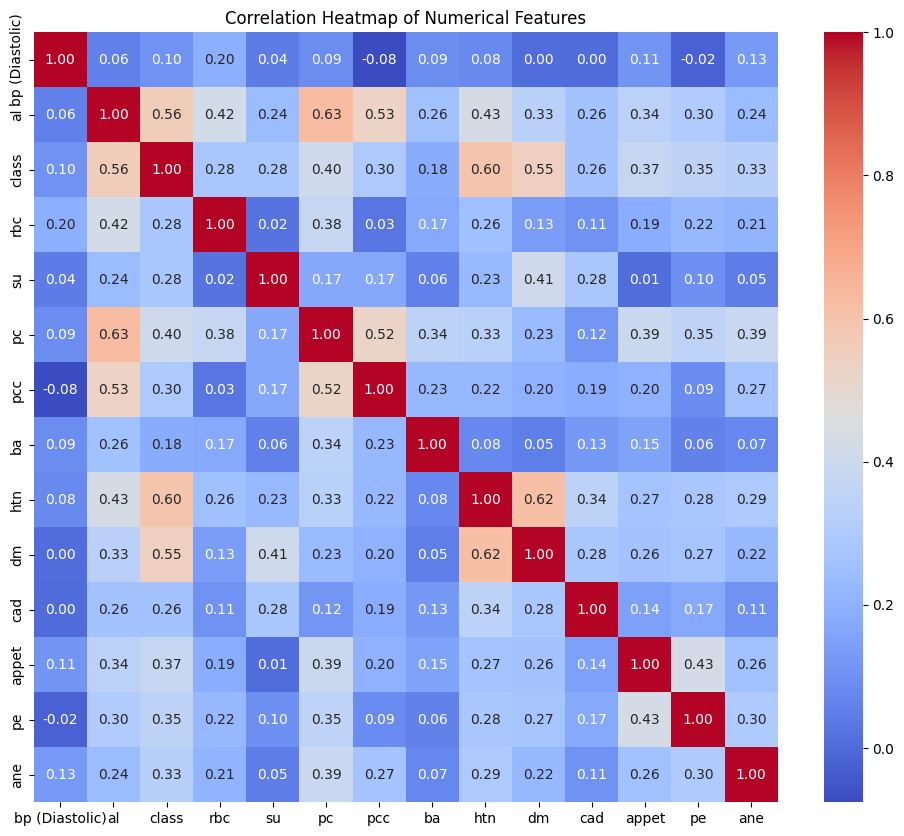

In [ ]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
import plotly.express as px

# Create an interactive box plot for 'age' by 'class'
fig = px.box(df, x='class', y='age',
             title='Distribution of Age by Class (Interactive)',
             labels={'class': 'Class (0: Not CKD, 1: CKD)', 'age': 'Age'},
             color='class') # Color the boxes by class

# Update layout for better labels on x-axis
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Not CKD', 'CKD']))

fig.show()

In [ ]:
# Create interactive scatter plots for additional pairs of numerical features

# Example 1: Serum Creatinine (sc) vs Blood Urea (bu)
fig1 = px.scatter(df, x='sc', y='bu', color='class',
                  title='Scatter Plot of Serum Creatinine vs Blood Urea (Interactive)',
                  labels={'class': 'Class (0: Not CKD, 1: CKD)'})
fig1.show()

# Example 2: Hemoglobin (hemo) vs Packed Cell Volume (pcv)
fig2 = px.scatter(df, x='hemo', y='pcv', color='class',
                  title='Scatter Plot of Hemoglobin vs Packed Cell Volume (Interactive)',
                  labels={'class': 'Class (0: Not CKD, 1: CKD)'})
fig2.show()

# Example 3: Blood Glucose Random (bgr) vs Diabetes Mellitus (dm)
# Since 'dm' is binary, we can plot it on the y-axis and color by it
fig3 = px.scatter(df, x='bgr', y='dm', color='dm',
                  title='Scatter Plot of Blood Glucose Random vs Diabetes Mellitus (Interactive)',
                  labels={'dm': 'Diabetes (0: No, 1: Yes)'})
fig3.update_layout(yaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No Diabetes', 'Diabetes']))
fig3.show()

In [ ]:
import plotly.express as px

# Create an interactive bubble plot for CKD vs Not CKD
fig = px.scatter(df, x='age', y='bgr', size='bu', color='class',
                 title='Bubble Plot of Age vs Blood Glucose Random (Bubble Size: Blood Urea) by Class',
                 labels={'class': 'Class (0: Not CKD, 1: CKD)', 'age': 'Age', 'bgr': 'Blood Glucose Random', 'bu': 'Blood Urea'})

fig.show()

In [ ]:
import plotly.express as px

# Create an interactive pie chart for the 'class' distribution
fig = px.pie(df, names='class', title='Distribution of CKD vs Non-CKD (Interactive)')

# Update layout for better labels
fig.update_traces(labels=['Not CKD', 'CKD'])

fig.show()

In [ ]:
import plotly.express as px

# Create interactive pie chart for 'htn' distribution
fig1 = px.pie(df, names='htn', title='Distribution of Hypertension (Interactive)')
fig1.update_traces(labels=['No Hypertension', 'Hypertension'])
fig1.show()

# Create interactive pie chart for 'dm' distribution
fig2 = px.pie(df, names='dm', title='Distribution of Diabetes Mellitus (Interactive)')
fig2.update_traces(labels=['No Diabetes', 'Diabetes'])
fig2.show()

# Create interactive pie chart for 'cad' distribution
fig3 = px.pie(df, names='cad', title='Distribution of Coronary Artery Disease (Interactive)')
fig3.update_traces(labels=['No CAD', 'CAD'])
fig3.show()

In [ ]:
import plotly.express as px

# Create an interactive histogram of age, colored by class
fig = px.histogram(df, x='age', color='class', barmode='group',
                   title='Distribution of Age by Class (Interactive)',
                   labels={'class': 'Class (0: Not CKD, 1: CKD)', 'age': 'Age'})

# Update layout for better labels
fig.update_layout(xaxis_title='Age', yaxis_title='Count')

fig.show()

In [ ]:
import plotly.express as px

# Create an interactive horizontal histogram of age, colored by class
fig = px.histogram(df, y='age', color='class', barmode='group',
                   title='Distribution of Age by Class (Horizontal, Interactive)',
                   labels={'class': 'Class (0: Not CKD, 1: CKD)', 'age': 'Age'})

# Update layout for better labels
fig.update_layout(yaxis_title='Age', xaxis_title='Count')

fig.show()

In [ ]:
from scipy import stats

# Separate age data for the two classes
age_ckd = df[df['class'] == 1]['age']
age_notckd = df[df['class'] == 0]['age']

# Perform independent samples t-test
# Assume unequal variances (Welch's t-test) which is generally safer
ttest_result = stats.ttest_ind(age_ckd, age_notckd, equal_var=False, nan_policy='omit')

# Print the results
print("Independent Samples t-test results for Age by Class:")
print(f"  Test Statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

# Interpret the results
alpha = 0.05
if ttest_result.pvalue < alpha:
    print(f"\nInterpretation: The difference in average age between the CKD and Non-CKD groups is statistically significant (p < {alpha}).")
else:
    print(f"\nInterpretation: The difference in average age between the CKD and Non-CKD groups is not statistically significant (p >= {alpha}).")

# Display the mean ages for reference
print(f"\nAverage age in CKD group: {age_ckd.mean():.2f}")
print(f"Average age in Non-CKD group: {age_notckd.mean():.2f}")

Independent Samples t-test results for Age by Class:
  Test Statistic: 4.0208
  P-value: 0.0001

Interpretation: The difference in average age between the CKD and Non-CKD groups is statistically significant (p < 0.05).

Average age in CKD group: 56.00
Average age in Non-CKD group: 47.77


In [ ]:
import plotly.express as px

# Create an interactive scatter plot with marginal histograms
fig = px.scatter(df, x='age', y='bgr', color='class',
                 marginal_y="histogram", marginal_x="histogram",
                 title='Distributed Scatter Plot of Age vs Blood Glucose Random by Class',
                 labels={'class': 'Class (0: Not CKD, 1: CKD)', 'age': 'Age', 'bgr': 'Blood Glucose Random'})

fig.show()